In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import random
import math

#### Skip List 程式碼來源
https://gist.github.com/sachinnair90/3bee2ef7dd3ff0dc5aec44ec40e2d127

In [26]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:

    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        while randint(1, 2) != 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):
        _node = Node(self.randomHeight(), elem)
        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)
        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1

    def remove(self, elem):
        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    def printList(self):
        for i in range(len(self.head.next)-1, -1, -1):
            x = self.head
            while x.next[i] != None:
                print(x.next[i].elem,)
                x = x.next[i]
            print('')

In [27]:
S = SkipList()

In [28]:
S.insert(3)

In [29]:
S.find(3)

#### Skip List Insertion
##### Insertion Time Complexity: O(log n)

In [31]:
t = 20
S = SkipList()
SInsertTime = list()
for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        S.insert(str((np.random.randint(1,(2**30)+1))))
    endtime = time.clock()
    SInsertTime.append(endtime - starttime)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [32]:
SInsertTime

[0.023315600000046288,
 0.036275799999998526,
 0.06380639999997584,
 0.13397840000004635,
 0.31763839999996435,
 0.7865851000000248,
 1.8879921999999851,
 4.070373700000005,
 9.733053700000028,
 21.41975059999993]

#### 剩餘時間估計


In [33]:
t = len(SInsertTime)
for i in range(0,21):
    if(i>=t):
        SInsertTime.append(SInsertTime[i-2]/SInsertTime[i-3]*SInsertTime[i-1])

#### Skip List Search
##### Search Time Complexity: O(log n)

In [34]:
t = 15

SSearchTime = list()

for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        S.find(str((np.random.randint(1,(2**30)+1))))
    endtime = time.clock()
    SSearchTime.append(endtime - starttime)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [35]:
SSearchTime

[0.037627400000019406,
 0.04687869999997929,
 0.09018700000001445,
 0.18848449999995864,
 0.3619105000000218]

#### 剩餘時間估計


In [36]:
t = len(SSearchTime)
for i in range(0,21):
    if(i>=t):
        SSearchTime.append(SSearchTime[i-2]/SSearchTime[i-3]*SSearchTime[i-1])

Text(0, 0.5, '時間')

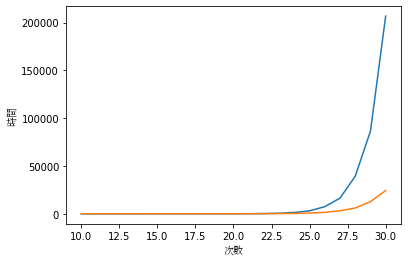

In [37]:
plt.plot(range(10,31),SInsertTime)
plt.plot(range(10,31),SSearchTime)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

#### Two Three Tree 程式碼的網址
https://codereview.stackexchange.com/questions/188305/2-3-tree-in-python

In [49]:
class Node:
    def __init__(self, data, parent=None):
        self.nodeType = 2
        self.d1, self.d2, self.d3 = data, None, None
        self.c1, self.c2, self.c3, self.c4 = None, None, None, None
        self.parent = parent
    def push(self, data):
        if self.nodeType == 2:
            self.nodeType = 3
            self.d1, self.d2 = sorted([self.d1, data])
        elif self.nodeType == 3:
            self.nodeType = 4
            self.d1, self.d2, self.d3 = sorted([self.d1, self.d2, data])
    def split(self):
        # Case O, if there is nothing to do
        if self.nodeType < 4:
            return
        # Case I, splitting when there is no parent
        if self.parent == None:
            leftChild = Node(self.d1, self)
            rightChild = Node(self.d3, self)
            leftChild.c1, leftChild.c2 = self.c1, self.c2
            rightChild.c1, rightChild.c2 = self.c3, self.c4
            self.nodeType = 2
            self.d1, self.d2, self.d3 = self.d2, None, None
            self.c1, self.c2, self.c3, self.c4 = leftChild, rightChild, None, None
        # Case II, when parent is a 2-node
        elif self.parent.nodeType == 2:
            # subcase a: when the current node is the left child of the parent node
            if self == self.parent.c1:
                midChild = Node(self.d3, self.parent)
                midChild.c1, midChild.c2 = self.c3, self.c4
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3 = self.parent.c1, midChild, self.parent.c2
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c1, self.c2, None, None
                self.d1, self.d2, self.d3 = self.d1, None, None
            # subcase b: when the current node is the right child of the parent node
            elif self == self.parent.c2:
                midChild = Node(self.d1, self.parent)
                midChild.c1, midChild.c2 = self.c1, self.c2
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3 = self.parent.c1, midChild, self.parent.c2
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c3, self.c4, None, None
                self.d1, self.d2, self.d3 = self.d3, None, None
        # Case III, when parent is a 3-node
        elif self.parent.nodeType == 3:
            # subcase a: when the current node is the left child of the parent node
            if self == self.parent.c1:
                newNode = Node(self.d3, self.parent)
                newNode.c1, newNode.c2 = self.c3, self.c4
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3, self.parent.c4 = self.parent.c1, newNode, self.parent.c2, self.parent.c3
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c1, self.c2, None, None
                self.d1, self.d2, self.d3 = self.d1, None, None
            # subcase b: when the current node is the middle child of the parent node
            elif self == self.parent.c2:
                newNode = Node(self.d3, self.parent)
                newNode.c1, newNode.c2 = self.c3, self.c4
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3, self.parent.c4 = self.parent.c1, self.parent.c2, newNode, self.parent.c3
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c1, self.c2, None, None
                self.d1, self.d2, self.d3 = self.d1, None, None
            # subcase c: when the current node is the right node of the parent node
            elif self == self.parent.c3:
                newNode = Node(self.d1, self.parent)
                newNode.c1, newNode.c2 = self.c1, self.c2
                self.parent.push(self.d2)
                self.parent.c1, self.parent.c2, self.parent.c3, self.parent.c4 = self.parent.c1, self.parent.c2, newNode, self.parent.c3
                self.nodeType = 2
                self.c1, self.c2, self.c3, self.c4 = self.c3, self.c4, None, None
                self.d1, self.d2, self.d3 = self.d3, None, None
            # now recursively split the parent
            self.parent.split()
    def insert(self, data):
        # if this node is a leaf
        if self.c1 == None:
            self.push(data)
            self.split()
        # if this node is not a leaf, and a 2-node
        elif self.nodeType == 2:
            if data < self.d1:
                self.c1.insert(data)
            else:
                self.c2.insert(data)
        # if this node is a 3-node
        elif self.nodeType == 3:
            if data < self.d1:
                self.c1.insert(data)
            elif data > self.d3:
                self.c3.insert(data)
            else:
                self.c2.insert(data)
    def find(self, data):
        # if this node is a leaf
        if self.c1 == None:
            if data in [self.d1, self.d2, self.d3]:
                return True
            else:
                return False
        # if this node is not a leaf, and a 2-node
        elif self.nodeType == 2:
            if data < self.d1:
                self.c1.find(data)
            else:
                self.c2.find(data)
        # if this node is a 3-node
        elif self.nodeType == 3:
            if data < self.d1:
                self.c1.find(data)
            elif data > self.d3:
                self.c3.find(data)
            else:
                self.c2.find(data)

class TwoThreeTree:
    def __init__(self):
        self.isEmpty = True
        self.root = None
    def insert(self, data):
        if self.isEmpty:
            self.isEmpty = False
            self.root = Node(data)
        else:
            self.root.insert(data)
    def find(self, data):
        if self.isEmpty:
            return False
        else:
            self.root.find(data)

In [50]:
T = TwoThreeTree()

In [51]:
T.insert(3)

In [52]:
T.find(3)

#### Two Three Tree Tree Insertion
##### Insertion Time Complexity: O(log n)

In [53]:
t = 20
T = TwoThreeTree()
TInsertTime = list()
for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        T.insert((np.random.randint(1,(2**30)+1)))
    endtime = time.clock()
    TInsertTime.append(endtime - starttime)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [54]:
TInsertTime

[0.007811699999933808,
 0.01823479999995925,
 0.03075139999998555,
 0.059320099999922604,
 0.10746889999995801,
 0.26133659999993597,
 0.49126879999994344,
 0.9387971999999536,
 1.9452545999999984,
 3.9813367000000426]

#### 剩餘時間估計


In [55]:
t = len(TInsertTime)
for i in range(0,21):
    if(i>=t):
        TInsertTime.append(TInsertTime[i-2]/TInsertTime[i-3]*TInsertTime[i-1])

#### Two Three Tree Search
##### Search Time Complexity: O(log n)

In [56]:
t = 20
TSearchTime = list()
for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        T.find((np.random.randint(1,(2**30)+1)))
    endtime = time.clock()
    TSearchTime.append(endtime - starttime)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [57]:
TSearchTime

[0.007134400000040841,
 0.014306599999940772,
 0.030268599999999424,
 0.052181200000063654,
 0.10214089999999487,
 0.22313430000008339,
 0.42386980000003405,
 0.8581874000000198,
 1.6989065999999866,
 3.694847099999947]

#### 剩餘時間估計


In [58]:
t = len(TSearchTime)
for i in range(0,21):
    if(i>=t):
        TSearchTime.append(TSearchTime[i-2]/TSearchTime[i-3]*TSearchTime[i-1])

Text(0, 0.5, '時間')

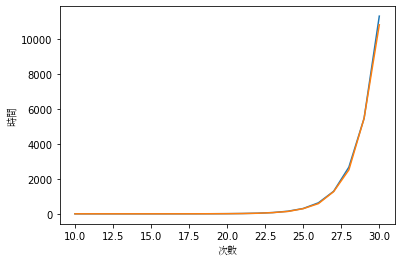

In [59]:
plt.plot(range(10,31),TInsertTime)
plt.plot(range(10,31),TSearchTime)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

#### Hash Table程式碼來源：
https://codereview.stackexchange.com/questions/118110/python-hash-table-implementation

In [60]:
class HashTable(object):
    table = [None] * 256
    def get_value(self, key):
        total = 0
        for i in range(len(key)):
            total += ord(key[i]) * (7**i)
        return (len(key) * total) % 256
    
    def insert(self, key):
        val = self.get_value(key)
        if self.table[val] == None:
            self.table[val] = key
        else:
            if type(self.table[val]) == list:
                self.table[val].append(key)
            else:
                self.table[val] = [self.table[val], key]
                
    def delete(self, key):
        val = self.get_value(key)
        if self.table[val] != None:
            if type(self.table[val]) == list:
                i = self.table[val].index(key)
                self.table[val][i] = None
            else:
                self.table[val] = None
        else:
            KeyError()

    def lookup(self, key):
        found = False
        val = self.get_value(key)
        if type(self.table[val]) == list:
            found = key in self.table[val]
        else:
            found = self.table[val] == key
        return found

In [61]:
H = HashTable()

In [62]:
H.insert(str(2)) ## 因為數字不能用len()這個函數，所以先轉換成字串

In [63]:
H.lookup(str(2))

True

#### Hash Table Insertion
##### Insertion Time Complexity: O(1)

In [64]:
t = 20
H = HashTable()
HInsertTime = list()

for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        H.insert(str((np.random.randint(1,(2**30)+1))))
    endtime = time.clock()
    HInsertTime.append(endtime - starttime)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [65]:
HInsertTime

[0.012488699999948949,
 0.023487600000066777,
 0.04386529999999311,
 0.0781282000000374,
 0.16659350000009,
 0.4260166000000254,
 0.7438600000000406,
 1.379498099999978,
 2.772900899999968,
 5.394141600000012]

#### 剩餘時間估計


In [66]:
t = len(HInsertTime)
for i in range(0,21):
    if(i>=t):
        HInsertTime.append(HInsertTime[i-2]/HInsertTime[i-3]*HInsertTime[i-1])

In [67]:
HInsertTime

[0.012488699999948949,
 0.023487600000066777,
 0.04386529999999311,
 0.0781282000000374,
 0.16659350000009,
 0.4260166000000254,
 0.7438600000000406,
 1.379498099999978,
 2.772900899999968,
 5.394141600000012,
 10.842653641471154,
 21.09228247639569,
 42.39716536170083,
 82.47547303245949,
 165.78226051897693,
 322.4972764109469,
 648.2451755515049,
 1261.0354262720762,
 2534.7815038250064,
 4930.926437613842,
 9911.554323049286]

#### Hash Table Search
##### Search Time Complexity: O(1)

In [68]:
t = 18

HSearchTime = list()

for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        H.lookup(str((np.random.randint(1,(2**30)+1))))
    endtime = time.clock()
    HSearchTime.append(endtime - starttime)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [69]:
HSearchTime

[0.45584249999990334,
 0.9309573000000455,
 1.846706999999924,
 3.6762633999999252,
 7.1961822999999185,
 14.52433910000002,
 28.805139900000086,
 56.60864470000001]

#### 剩餘時間估計


In [70]:
t = len(HSearchTime)
for i in range(0,21):
    if(i>=t):
        HSearchTime.append(HSearchTime[i-2]/HSearchTime[i-3]*HSearchTime[i-1])

In [71]:
HSearchTime

[0.45584249999990334,
 0.9309573000000455,
 1.846706999999924,
 3.6762633999999252,
 7.1961822999999185,
 14.52433910000002,
 28.805139900000086,
 56.60864470000001,
 112.26809832145109,
 220.63232156090567,
 437.5651687327848,
 859.9149754481733,
 1705.4112410450218,
 3351.5205739967064,
 6646.844193530539,
 13062.559065294708,
 25906.09037266473,
 50911.35368768906,
 100969.04619035413,
 198427.11687325043,
 393527.08733491617]

Text(0, 0.5, '時間')

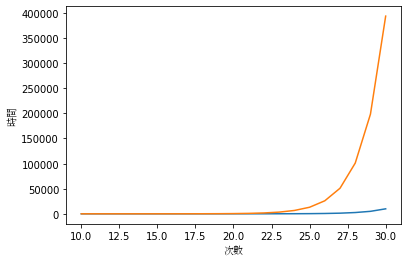

In [72]:
plt.plot(range(10,31),HInsertTime)
plt.plot(range(10,31),HSearchTime)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

#### Sorted Array 程式碼來源
https://www.geeksforgeeks.org/search-insert-and-delete-in-a-sorted-array/

In [97]:
# Inserts a key in arr[] of given capacity.  
# n is current size of arr[]. This function  
# returns n+1 if insertion is successful, else n. 
def insertSorted(arr, n, key, capacity): 
    # Cannot insert more elements if n is >= capcity 
    arr.append(0)
    capacity = capacity + 1
    if (n >= capacity): 
        return n 
    i = n - 1
    while i >= 0 and arr[i] > key: 
        arr[i + 1] = arr[i] 
        i -= 1
    arr[i + 1] = key 
    return (n + 1)
def deleteElement(arr, n, key):   
    # Find position of element to be deleted  
    pos = binarySearch(arr, 0, n - 1, key)  
    if (pos == -1): 
        print("Element not found") 
        return n        
    # Deleting element  
    for i in range(pos,n - 1): 
        arr[i] = arr[i + 1]    
    return n - 1 
# To search a ley to be deleted  
def binarySearch(arr, low, high, key):  
    if (high < low): 
        return -1 
    mid = (low + high) // 2    
    if (key == arr[mid]): 
        return mid  
    if (key > arr[mid]): 
        return binarySearch(arr, (mid + 1), high, key)     
    return binarySearch(arr, low, (mid - 1), key)    
# This code is contributed by Mohit Kumar 

#### Sorted Array Insertion
##### Insertion Time Complexity: O(n)

In [98]:
t = 15
AInsertTime = list()
for n in range (10,t):
    arr = []
    arr.append(0)
    count = 0
    starttime = time.clock()
    for i in range(1,2**n+1):
        capacity = len(arr)
        key = np.random.randint(1,(2**30)+1)
        count = insertSorted(arr, count, key, capacity)
    endtime = time.clock()
    AInsertTime.append(endtime - starttime)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [99]:
AInsertTime

[0.05456260000005386,
 0.1392031999999972,
 0.5542382000000998,
 2.1891774999999143,
 9.20237659999998]

#### 剩餘時間估計


In [100]:
t = len(AInsertTime)
for i in range(0,21):
    if(i>=t):
        AInsertTime.append(AInsertTime[i-2]/AInsertTime[i-3]*AInsertTime[i-1])

#### Sorted Array Search
##### Search Time Complexity: O(log n)

In [101]:
t = 17
ASearchTime = list()

for n in range (10,t):
    starttime = time.clock()
    for i in range(1,2**n+1):
        height = len(arr)
        key = np.random.randint(1,(2**30)+1)
        index = binarySearch(arr, 0, height, key)
    endtime = time.clock()
    ASearchTime.append(endtime - starttime)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [102]:
ASearchTime

[0.018041899999957423,
 0.027072900000007394,
 0.04333650000000944,
 0.0795987999999852,
 0.16951019999999062,
 0.3132875999999669,
 0.6691697999999633]

#### 剩餘時間估計


In [103]:
t = len(ASearchTime)
for i in range(0,21):
    if(i>=t):
        ASearchTime.append(ASearchTime[i-2]/ASearchTime[i-3]*ASearchTime[i-1])

Text(0, 0.5, '時間')

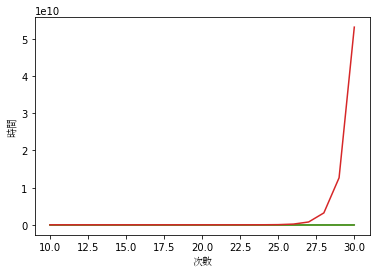

In [104]:
plt.plot(range(10,31),SInsertTime)
plt.plot(range(10,31),TInsertTime)
plt.plot(range(10,31),HInsertTime)
plt.plot(range(10,31),AInsertTime)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

Text(0, 0.5, '時間')

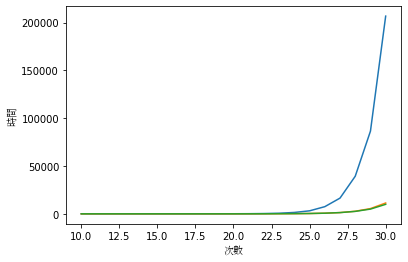

In [105]:
plt.plot(range(10,31),SInsertTime)
plt.plot(range(10,31),TInsertTime)
plt.plot(range(10,31),HInsertTime)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

Text(0, 0.5, '時間')

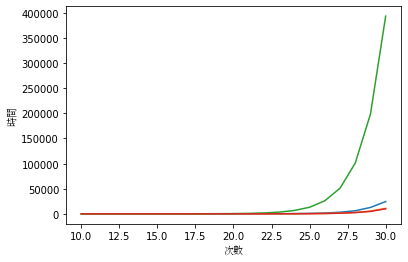

In [106]:
plt.plot(range(10,31),SSearchTime)
plt.plot(range(10,31),TSearchTime)
plt.plot(range(10,31),HSearchTime)
plt.plot(range(10,31),ASearchTime)
plt.xlabel("次數",fontproperties='SimSun')
plt.ylabel("時間",fontproperties='SimSun')

In [107]:
SInsertTime[20]

206694.9554055764

In [108]:
TInsertTime[20]

11316.683780418289

In [109]:
HInsertTime[20]

9911.554323049286

In [110]:
AInsertTime[20]

53153072969.326126

In [111]:
SSearchTime[20]

24336.55631779841

In [112]:
TSearchTime[20]

10820.704249278288

In [113]:
HSearchTime[20]

393527.08733491617

In [114]:
ASearchTime[20]

9998.153687419564